<a href="https://colab.research.google.com/github/BAHAMLAOUHI/Data-Mining-Project/blob/main/EDA_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('onlinefraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
df_copy=df.copy()

In [ ]:
df=df_copy.drop('isFraud',axis=1)

# Préparation des données


1.   Nettoyage des données
2.   Visualisation et Comprendre les relations entre les caractéristique
3.   Sélection des caractéristiques
4.   Transformation de données
5.   Réduction de dimensionnalité




1.   Nettoyage des données


* les valeurs manquantes
* eliminer les duplications
* Type de données incorrect ou déroutant
* caractéristiques Redondantes: représentent les mêmes informations
* caractéristique Inutile pour l'exploration de données
* caractéristique Contient trop de valeurs manquantes
* imputation des données si necessaire





In [ ]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFlaggedFraud,0


In [ ]:
rows_with_null = df[df.isnull().any(axis=1)]

print(rows_with_null)


Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFlaggedFraud]
Index: []


In [ ]:
len(rows_with_null)

0

In [ ]:
# df.drop(rows_with_null.index, inplace=True)
# df.isna().sum()

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [ ]:
df.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [ ]:
df["type"].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [ ]:
df["nameOrig"].value_counts()

,count
nameOrig,
C1902386530,3
C363736674,3
C545315117,3
C724452879,3
C1784010646,3
...,...
C98968405,1
C720209255,1
C1567523029,1


In [ ]:
df["nameDest"].value_counts()

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M1470027725,1
M1330329251,1
M1784358659,1


In [ ]:
df.drop(['nameDest', 'nameOrig'],axis=1,inplace=True)

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [ ]:
df[df["isFlaggedFraud"] == 1]


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,4953893.08,4953893.08,0.0,0.0,1
3247297,250,TRANSFER,1343002.08,1343002.08,1343002.08,0.0,0.0,1
3760288,279,TRANSFER,536624.41,536624.41,536624.41,0.0,0.0,1
5563713,387,TRANSFER,4892193.09,4892193.09,4892193.09,0.0,0.0,1
5996407,425,TRANSFER,10000000.00,19585040.37,19585040.37,0.0,0.0,1
5996409,425,TRANSFER,9585040.37,19585040.37,19585040.37,0.0,0.0,1
6168499,554,TRANSFER,3576297.10,3576297.10,3576297.10,0.0,0.0,1
6205439,586,TRANSFER,353874.22,353874.22,353874.22,0.0,0.0,1
6266413,617,TRANSFER,2542664.27,2542664.27,2542664.27,0.0,0.0,1
6281482,646,TRANSFER,10000000.00,10399045.08,10399045.08,0.0,0.0,1


In [ ]:
df.drop(df[df["isFlaggedFraud"] == 1].index, inplace=True)

In [22]:
df.drop('isFlaggedFraud',axis=1,inplace=True)

In [ ]:
df.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.068824e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,9.731202e-01,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,0.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# df.to_csv('onlinefraud_cleaned.csv', index=False)

In [21]:
df=pd.read_csv('onlinefraud_cleaned.csv')

3. Transformation de données


*   Normalisation
*   Encodage des données



In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790510 entries, 0 to 1790509
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 95.6+ MB


In [24]:
df.type.value_counts()

,count
type,
CASH_OUT,640642
PAYMENT,595486
CASH_IN,393810
TRANSFER,148743
DEBIT,11829



***When to use One-Hot Encoding vs. Label Encoding:**


**One-Hot Encoding:**

Use when:
- The categorical feature has no inherent order or ranking.
- The number of unique categories is relatively small.
- You want to avoid introducing unintended ordinal relationships between categories.

**Label Encoding:**

Use when:
- The categorical feature has an inherent order or ranking.
- You want to reduce dimensionality compared to one-hot encoding.


the different transaction types might not have a natural order.
For example, "PAYMENT," "CASH_OUT," "CASH_IN," "TRANSFER," and "DEBIT" are distinct types of transactions, but there's no clear ranking or order between them.

it might be better to use one-hot encoding because it prevents the model from assuming an unintended order between these transaction types.



In [25]:
# using Pandas
df = pd.get_dummies(df, columns=['type'], prefix='type')


In [26]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,False,False,False,True,False


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790510 entries, 0 to 1790509
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   type_CASH_IN    bool   
 7   type_CASH_OUT   bool   
 8   type_DEBIT      bool   
 9   type_PAYMENT    bool   
 10  type_TRANSFER   bool   
dtypes: bool(5), float64(5), int64(1)
memory usage: 90.5 MB


In [28]:
df['type_CASH_IN'] = df['type_CASH_IN'].map({False:0, True:1, })
df['type_CASH_OUT'] = df['type_CASH_OUT'].map({False:0, True:1, })
df['type_DEBIT'] = df['type_DEBIT'].map({False:0, True:1, })
df['type_PAYMENT'] = df['type_PAYMENT'].map({False:0, True:1, })
df['type_TRANSFER'] = df['type_TRANSFER'].map({False:0, True:1, })

In [29]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [30]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06
mean,7.504265e+01,1.624391e+05,8.570600e+05,8.782974e+05,9.963520e+05,1.118362e+06,2.199429e-01,3.577986e-01,6.606498e-03,3.325790e-01,8.307298e-02
std,5.898352e+01,2.690274e+05,2.921965e+06,2.958087e+06,2.306179e+06,2.404264e+06,4.142078e-01,4.793526e-01,8.101145e-02,4.711373e-01,2.759926e-01
min,1.000000e+00,6.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.900000e+01,1.327916e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.200000e+01,7.945326e+04,1.504800e+04,0.000000e+00,1.380910e+05,2.305965e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.370000e+02,2.186809e+05,1.226075e+05,1.652917e+05,9.484343e+05,1.158110e+06,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.620000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.228378e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


The Standard Scaler is one of the most widely used scaling algorithms. It assumes that the data follows a Gaussian distribution. Before scaling numerical features, I have to check whether they follow normal distribution:

In [31]:
df["step"].value_counts()

,count
step,
19,51352
18,49579
139,46054
43,45060
15,44609
...,...
54,4
76,4
114,4


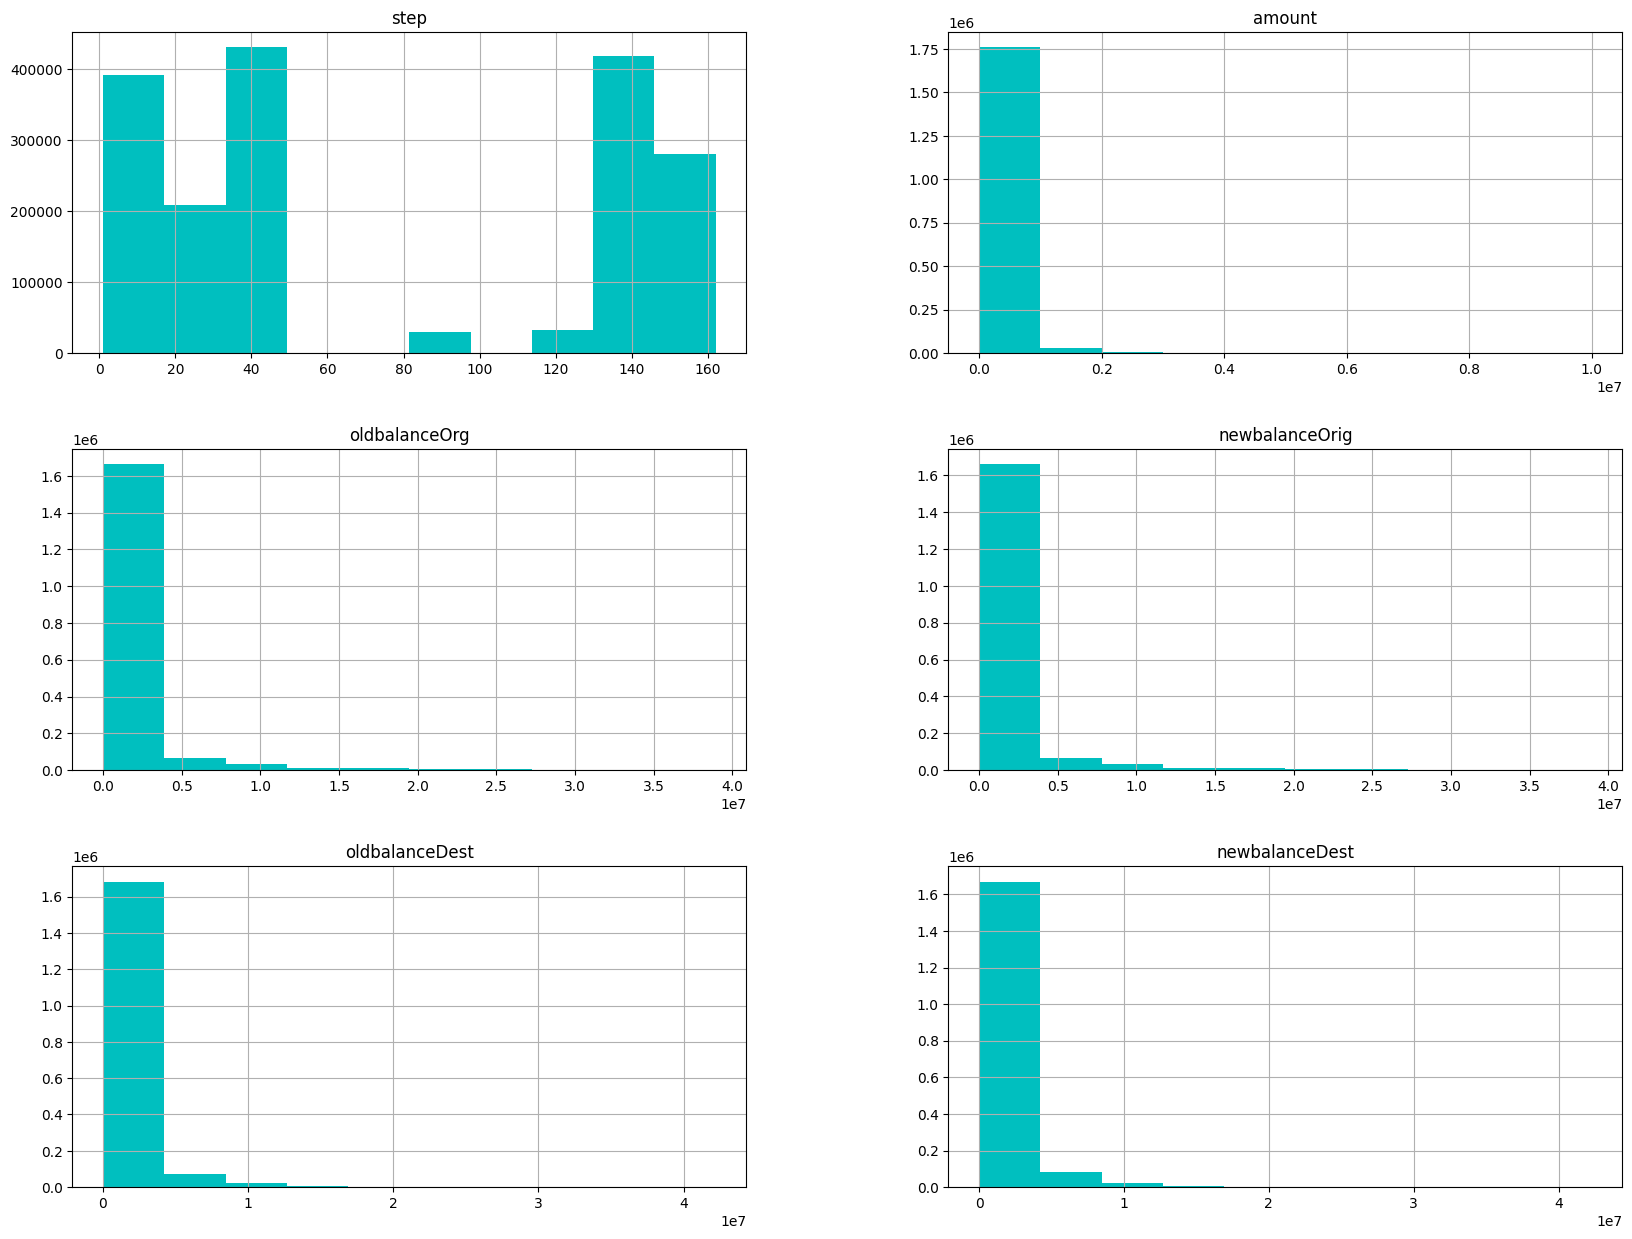

In [32]:
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

(df[numerical_features]+0.001).hist(figsize=(20, 15), color = 'c');

Log Transformation:

we have to avoid log transformation because our outliers are important and useful for clustering:

Log transformation will compress the data range, reducing the relative impact of outliers, which might obscure their significance in cluster formation.
Since i want to retain the distinctiveness of outliers, log transformation is not suitable for this case.

StandardScaler:
StandardScaler will standardize the features, ensuring that all features contribute equally to the clustering process, but it will not distort the relationship between normal data points and outliers.
It preserves the relative distances between data points, meaning our outliers will still remain distinct and can influence cluster formation.

In [33]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [35]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.255311,-0.567227,-0.235090,-0.242725,-0.432036,-0.465158,0,0,0,1,0
1,-1.255311,-0.596872,-0.286044,-0.290361,-0.432036,-0.465158,0,0,0,1,0
2,-1.255311,-0.603129,-0.293254,-0.296914,-0.432036,-0.465158,0,0,0,0,1
3,-1.255311,-0.603129,-0.293254,-0.296914,-0.422851,-0.465158,0,1,0,0,0
4,-1.255311,-0.560430,-0.279095,-0.286811,-0.432036,-0.465158,0,0,0,1,0


In [36]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06,1.790510e+06
mean,1.015906e-16,3.712818e-17,-2.057844e-16,1.357822e-16,2.255628e-17,-8.338364e-17,2.199429e-01,3.577986e-01,6.606498e-03,3.325790e-01,8.307298e-02
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.142078e-01,4.793526e-01,8.101145e-02,4.711373e-01,2.759926e-01
min,-1.255311e+00,-6.038015e-01,-2.933164e-01,-2.969140e-01,-4.320361e-01,-4.651578e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-9.501411e-01,-5.544418e-01,-2.933164e-01,-2.969140e-01,-4.320361e-01,-4.651578e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-5.602016e-01,-3.084664e-01,-2.881664e-01,-2.969140e-01,-3.721573e-01,-3.692463e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.050418e+00,2.090559e-01,-2.513557e-01,-2.410361e-01,-2.077799e-02,1.653240e-02,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.474265e+00,3.656715e+01,1.303314e+01,1.286911e+01,1.786985e+01,1.712184e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


3.   Visualisation et Comprendre les relations entre les caractéristique


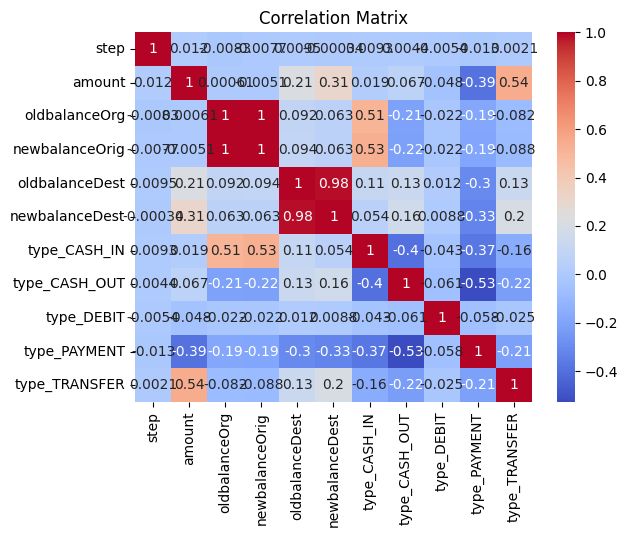

In [37]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

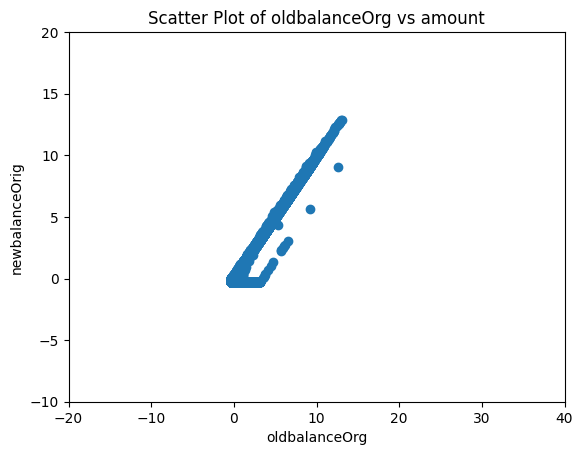

In [38]:
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'])
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('Scatter Plot of oldbalanceOrg vs amount')
plt.xlim(-20, 40)
plt.ylim(-10, 20)
plt.show()

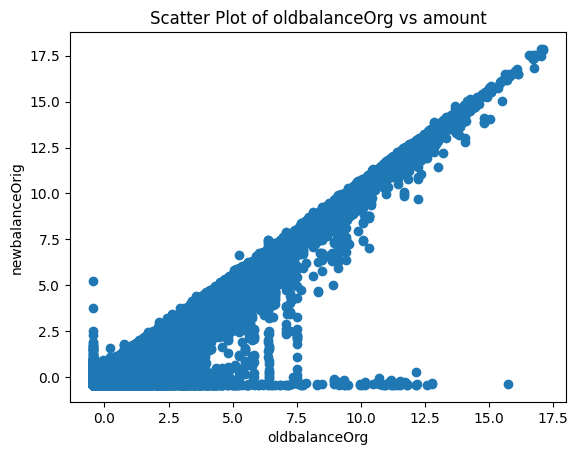

In [39]:
plt.scatter(df['newbalanceDest'], df['oldbalanceDest'])
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('Scatter Plot of oldbalanceOrg vs amount')
# plt.xlim(-10, 70)
# plt.ylim(-10, 70)
plt.show()

We notice that both


*   newbalanceDes & newbalanceDest
*  oldbalanceOrg & newbalanceOrig

are highly corrolated so we can choose one of each and drop the other

( i'm going to choose for example oldbalanceOrg and oldbalanceDes)


In [40]:
df.drop(['newbalanceOrig', 'newbalanceDest'],axis=1,inplace=True)

In [41]:
df.head(2)

,step,amount,oldbalanceOrg,oldbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.255311,-0.567227,-0.235090,-0.432036,0,0,0,1,0
1,-1.255311,-0.596872,-0.286044,-0.432036,0,0,0,1,0


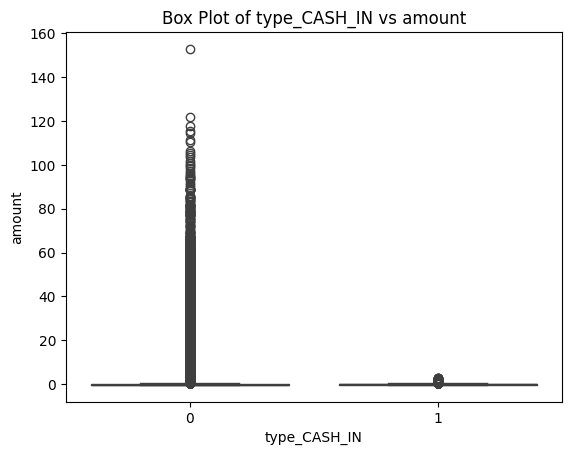

In [ ]:
sns.boxplot(x='type_CASH_IN', y='amount', data=df)
plt.title('Box Plot of type_CASH_IN vs amount')
plt.show()

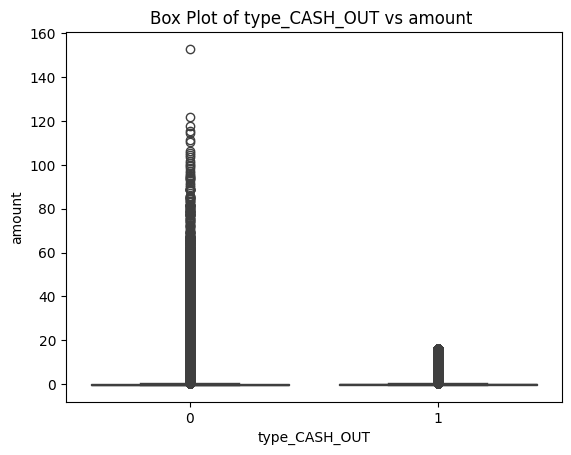

In [ ]:
sns.boxplot(x='type_CASH_OUT', y='amount', data=df)
plt.title('Box Plot of type_CASH_OUT vs amount ')
plt.show()

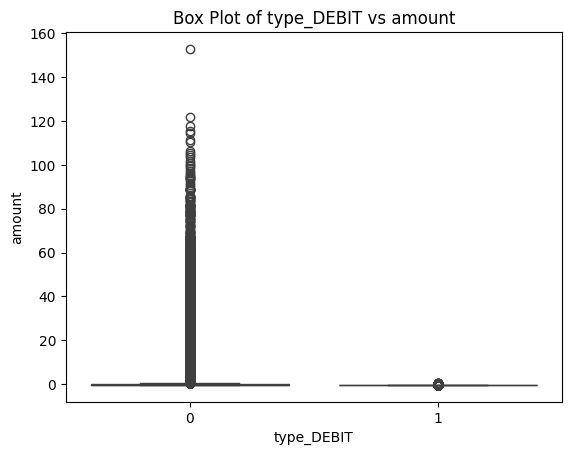

In [ ]:
sns.boxplot(x='type_DEBIT', y='amount', data=df)
plt.title('Box Plot of type_DEBIT vs amount')
plt.show()

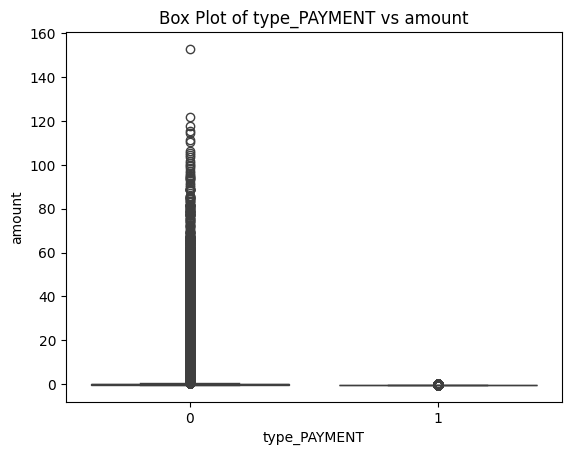

In [ ]:
sns.boxplot(x='type_PAYMENT', y='amount', data=df)
plt.title('Box Plot of type_PAYMENT vs amount')
plt.show()

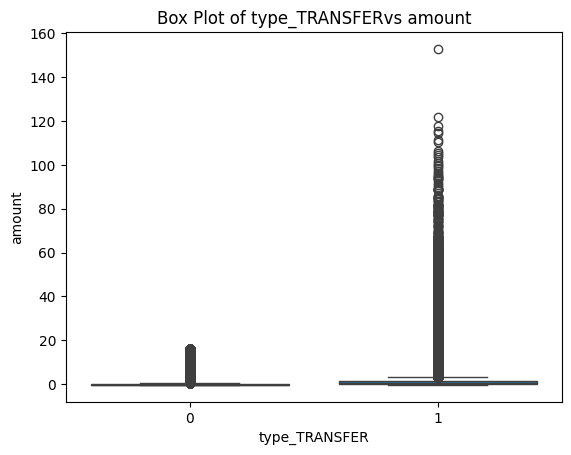

In [ ]:
sns.boxplot(x='type_TRANSFER', y='amount', data=df)
plt.title('Box Plot of type_TRANSFERvs amount')
plt.show()

In [42]:
df.to_csv('onlinefraud_final.csv', index=False)